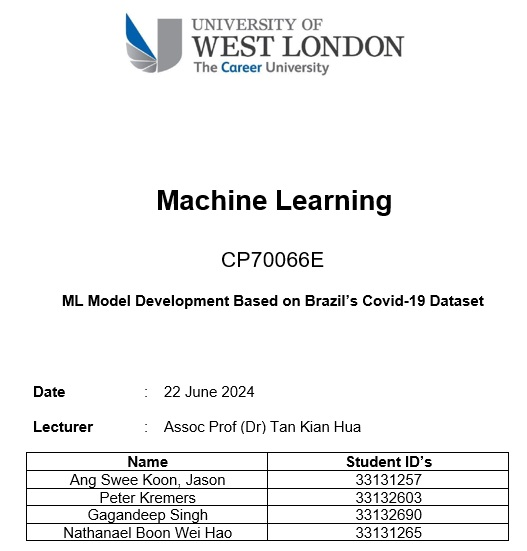

#**Table of Contents**

**Introduction**

**Problem Statement**

**Project Tasks & Deliverables**

**Exploratory Data Analysis**

**Data Preparation for ML**

**ML Model Development**

**AIF360 Ethical-and-Fairness**

**Conclusion**

**Executive Summary**

**Peer Assessment Form**

**References**



#**Introduction**

The COVID-19 pandemic has profoundly impacted nations worldwide, with Brazil being one of the hardest-hit countries. By May 26, 2021, Brazil had recorded over 16 million confirmed cases and 454,429 deaths, as reported by the Johns Hopkins Coronavirus Resource Centre (Johns Hopkins University, 2021). The pandemic's rapid escalation, beginning with the first case on February 26, 2020, led to widespread community transmission by March 20, 2020. This surge exerted immense pressure on Brazil's healthcare infrastructure, resulting in critical shortages of ICU beds, healthcare professionals, personal protective equipment, and other essential medical resources.

The severe strain on Brazil's healthcare system highlighted the urgent need for innovative solutions to manage the overwhelming demand and limited capacity. In response to this crisis, a team of data scientists at Sírio Libanês, a renowned healthcare institution in Brazil, took the initiative to leverage machine learning (ML) to develop a model capable of predicting the likelihood of a confirmed COVID-19 patient requiring ICU admission. This model aims to optimize resource allocation and improve patient outcomes by enabling proactive and informed decision-making in the healthcare system.

#**Problem Statement**

The primary challenge addressed in this report is the optimization of ICU resource allocation in Brazil's healthcare system during the COVID-19 pandemic. With the healthcare system under immense pressure, **the objective is to develop and validate a machine learning model that predicts the likelihood of ICU admission for COVID-19 patients**. By improving predictive capabilities, this model aims to assist healthcare professionals in making timely and informed decisions, ultimately enhancing patient outcomes and alleviating the strain on critical care resources.

The Sírio Libanês team has curated a comprehensive dataset comprising of anonymized clinical data of COVID-19 patients and the target variable indicating the need for intensive care. By sharing this dataset on the Kaggle platform, they invite the global community to contribute their expertise and innovative insights to enhance patient care during the ongoing pandemic (Hospital Sírio-Libanês, 2020).

#**Project Tasks & Deliverables**

The team is tasked with performing a full lifecycle ML model development, following the objectives of the dataset. This involves several key stages.

1.   **Exploratory Data Analysis (EDA):** Initially, the team will undertake EDA to establish hypotheses regarding the predictive insights expected from the dataset. It is essential to consider the ethical dimensions of data analysis during this phase to ensure responsible and unbiased findings.

2.   **Data Preparation for ML:** Following the EDA, the team will prepare the data for machine learning, informed by the insights gained from the initial analysis. This stage is critical as it ensures that the data is clean, well-structured, and suitable for the ML algorithms to be employed.

3.   **ML Model Development:** The next step is the development of the ML model. The team is required to evaluate at least three machine learning algorithms that have been covered in this module. This evaluation should include a thorough assessment of associated issues such as hyperparameters tuning, performance metrics, and model complexity, specifically addressing concerns of underfitting and overfitting.

4.   **AIF360 Ethical-and-Fairness:** An integral part of the project is to ensure the ethical and fair use of the ML model. The team will utilize the AIF360 toolkit to evaluate and ensure fairness in the model. This includes measuring bias using metrics like disparate impact, equal opportunity, and disparate mistreatment. The team will need to pre-process the data to reduce bias, using techniques such as data reweighting, oversampling underrepresented groups, and synthetic data generation to balance the dataset. Additionally, post-processing adjustments or re-ranking of model predictions will be necessary to enhance fairness while maintaining overall model performance. Evaluating the model's fairness by observing how different fairness metrics change with various bias mitigation techniques and using AIF360's bias mitigation algorithms during model training to actively reduce bias in predictions is crucial.

# **Exploratory Data Analysis**

In order to gain a comprehensive understanding of the dataset and prepare it for subsequent modelling, a thorough exploratory data analysis (EDA) was conducted. This process involved several key steps, including data loading, handling missing values, verifying data types, generating descriptive statistics, visualizing key variables, and performing a correlation analysis. Each of these steps is detailed below.

**Loading the Dataset:** The analysis begins with loading the dataset from the specified file path using the pandas library. This dataset contains detailed information about COVID-19 patients and their likelihood of requiring ICU admission. By displaying the first few rows of the dataset, an initial understanding of its structure and contents was obtained. Additionally, the column names were printed to familiarize with the available features.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/Peterkr-SOA/CP70066E/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

**Verifying Data Types:** Ensuring that each column in the dataset has the appropriate data type is crucial, as this affects how the data can be analysed and visualized. The data types of all columns were printed to verify that numeric variables were correctly identified as numerical data types (e.g., float64 or int64), and categorical variables were correctly identified as object data types. This step helped identify any discrepancies or misclassifications in the data types.

In [ ]:
# Display the first few rows and the columns of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nColumn names:")
print(data.columns)

First few rows of the dataset:
   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0

In [ ]:
# Verify data types
print("\nData Types:")
print(data.dtypes)


Data Types:
PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object


**Observations:** The dataset consists of 225 columns with a float64 type, 4 integer columns, and 2 object type columns.

The columns consist of the following information:
* Patient demographic information (3 features)
* Patient previous grouped diseases (9 features)
* Vital signs (6 features)
* Blood and urine test results (36 features)
* ICU admission details (2 features)


**Descriptive Statistics.** Descriptive statistics provided a comprehensive overview of the dataset, summarizing the central tendency, dispersion, and shape of the distribution for each variable. Using the describe method, summary statistics were generated for both numerical and categorical variables. This included measures such as mean, median, standard deviation, and quartiles for numeric variables, and counts and unique values for categorical variables. These statistics helped in understanding the overall distribution and variability of the data.

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Descriptive Statistics:
        PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL       GENDER  \
count                1925.000000  1925.000000          1925  1925.000000   
unique                       NaN          NaN            10          NaN   
top                          NaN          NaN          20th          NaN   
freq                         NaN          NaN           215          NaN   
mean                  192.000000     0.467532           NaN     0.368831   
std                   111.168431     0.499074           NaN     0.482613   
min                     0.000000     0.000000           NaN     0.000000   
25%                    96.000000     0.000000           NaN     0.000000   
50%                   192.000000     0.000000           NaN     0.000000   
75%                   288.000000     1.000000           NaN     1.000000   
max                   384.000000     1.000000           NaN     1.000000   

        DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPI

**Obeservations on the dataset:**
Upon reviewing the entire data set, it appears that the data has been normalized already, as the values fall within the range of -1 to 1, with the exception of the patient identifier and any categorical attributes.

There are five rows for each patient. Multiple entries represent different stages of the patient since its admission into the hospital. Additionally, the ‘Window’ column corresponds to the time period following hospital admission. <BR>
While there are 1925 rows in the dataset, based on the PATIENT_VISIT_IDENTIFIER column, there are only 385 unique patients.



In [ ]:
#total number of unique patients
print(f"The total number of patients from the dataset is: {data['PATIENT_VISIT_IDENTIFIER'].max()+1}.")

The total number of patients from the dataset is: 385.


**Checking for Missing Values:** Missing values, a common issue in real-world datasets, can significantly impact analysis if not properly addressed. In this step, we examine the dataset for columns with missing values.

Missing values in dataset =  223863 



<Axes: >

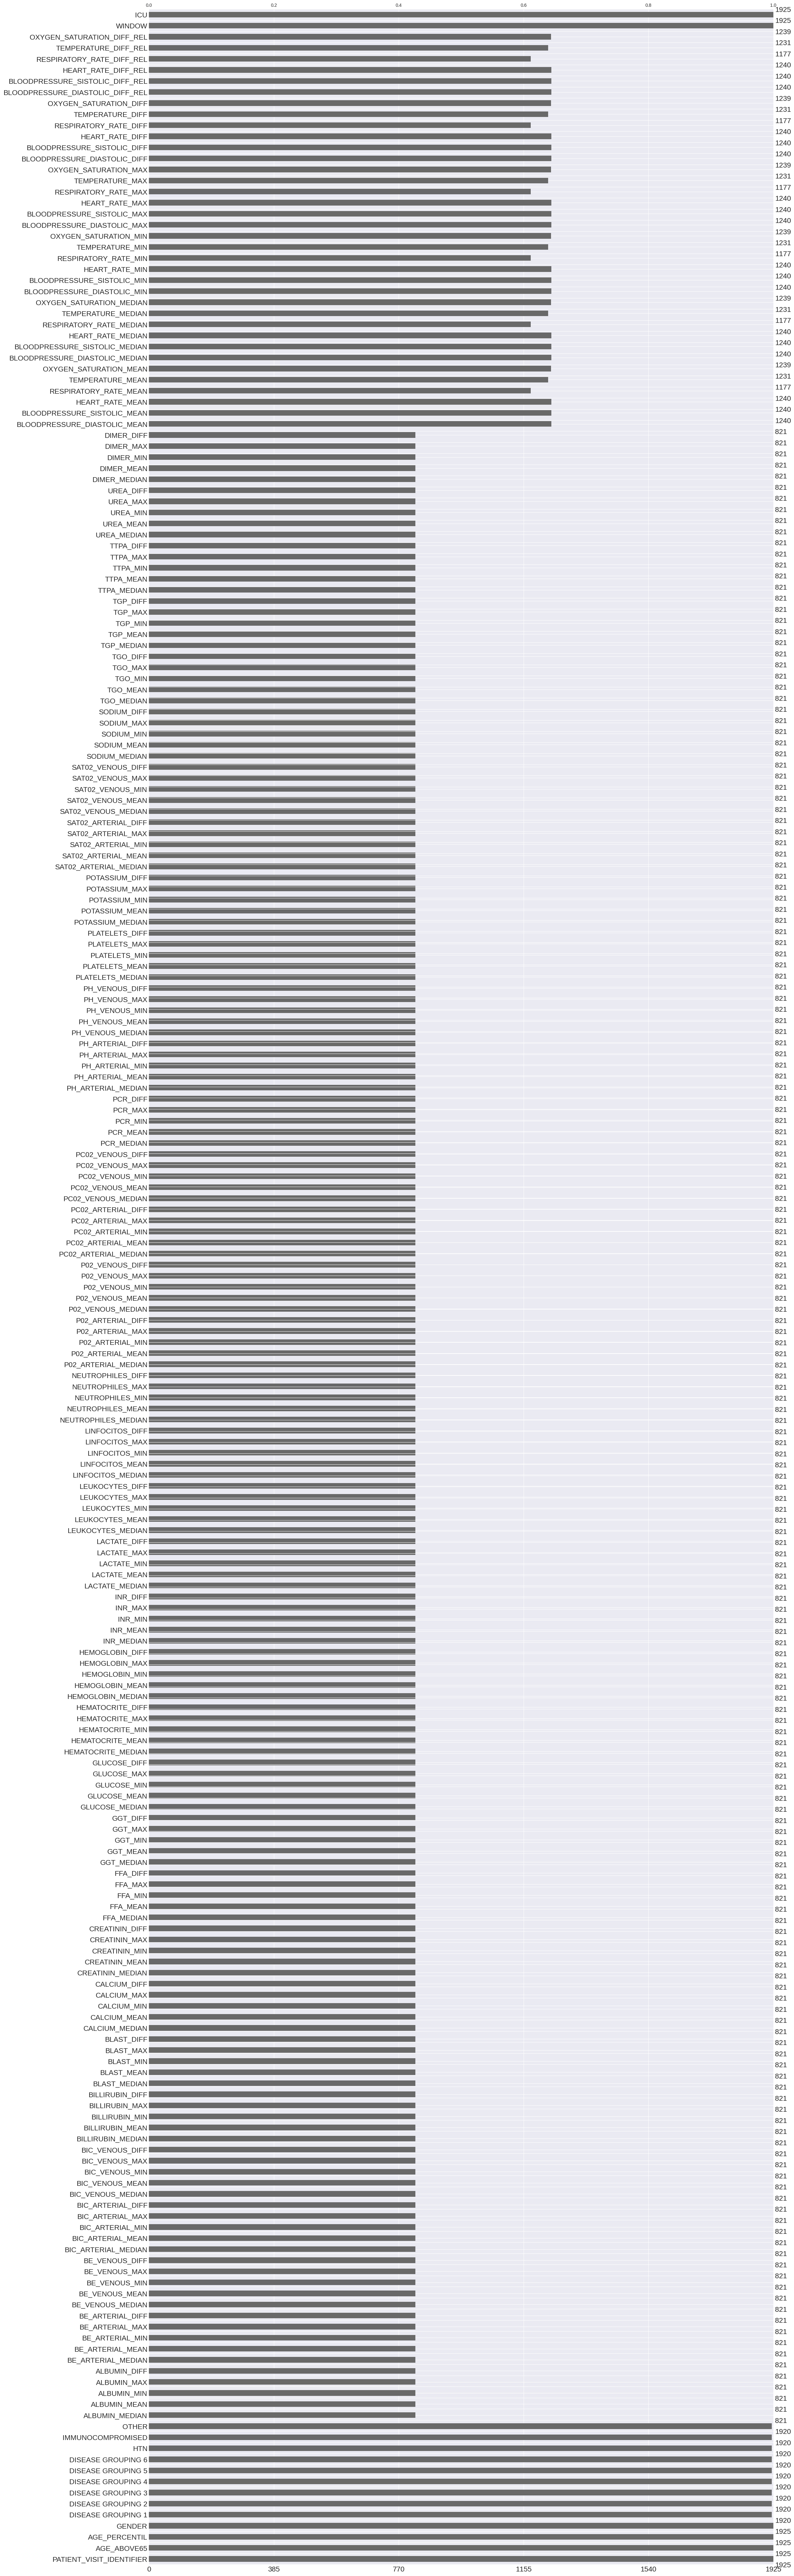

In [ ]:
# Checking for missing values
print('Missing values in dataset = ',data.isnull().sum().sum(),'\n')

# Load missing data visualization library
import missingno as msno
msno.bar(data)

In [ ]:
# Missing values in categorical columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns
print(f"Categorical columns: {categorical_columns}")
missing_values_AGE_PERCENTIL = data['AGE_PERCENTIL'].isnull().sum()
missing_values_WINDOW = data['WINDOW'].isnull().sum()

print(f"The number of missing values in column 'AGE_PERCENTIL' is: {missing_values_AGE_PERCENTIL}")
print(f"The number of missing values in column 'WINDOW' is: {missing_values_WINDOW}")

Categorical columns: Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')
The number of missing values in column 'AGE_PERCENTIL' is: 0
The number of missing values in column 'WINDOW' is: 0


**Observations on missing data:**  Significant portions of patient diagnostic data are incomplete. Eliminating the columns isn’t feasible as it would result in the loss of substantial data. The graph clearly indicates that approximately half of the numerical data is characterized by missing values. <BR>

According to the information provided by the data publishers, patient vital signs are recorded at varying intervals and frequencies. This implies that in instances where diagnostic data is absent, it can be reasonably inferred that there were no significant fluctuations in the vital signs during the periods without recorded values.


Categorical columns in this dataset did not contain any missing values.

**Checking for Duplicate Data:** The code checks for and removes duplicate rows in the dataset using data.drop_duplicates(), ensuring that each row in the dataset represents unique information.

In [ ]:
#Verifying data set for duplicate rows
print(f'Original data set shape (rows, columns) {data.shape}')
data.drop_duplicates()
print(f'Data set shape after removing duplicates (rows, columns) {data.shape}')


Original data set shape (rows, columns) (1925, 231)
Data set shape after removing duplicates (rows, columns) (1925, 231)


**Observations on duplicate data:** The shape of the original dataset was found to be 1925 rows and 231 columns, and this shape remained unchanged after removing duplicates, indicating that there were no duplicate rows in the dataset. This finding is important as duplicates can skew the analysis and the model's understanding of the data.

##Visualizations##
Visualizations are a powerful tool for exploring and understanding the data. Several types of plots were created to visualize the distribution of key variables. For instance, a histogram was used to visualize the distribution of the AGE_ABOVE65 variable, which indicates whether a patient is above 65 years old, providing insight into the proportion of patients in this age group. A count plot for the GENDER variable visualized the distribution of male and female patients. Additionally, box plots were used to identify outliers in continuous variables such as HEART_RATE_MEAN, BLOOD_PRESSURE_SISTOLIC_MEAN, and BLOOD_PRESSURE_DIASTOLIC_MEAN. Box plots are particularly useful for detecting outliers and understanding the spread of the data.

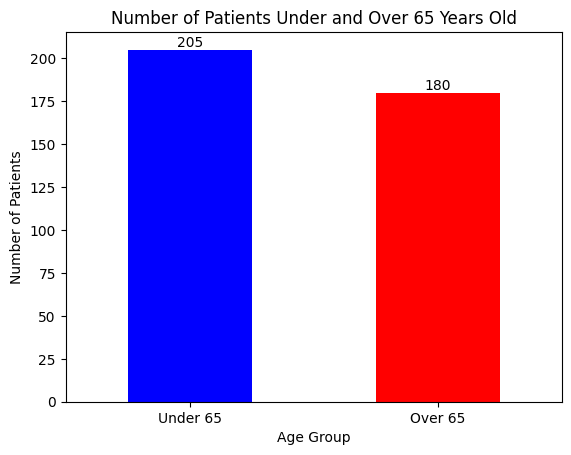

In [ ]:
# Grouping the data by AGE_ABOVE65 and counting the unique patient IDs
age_groups = data.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].nunique()

# Creating a bar chart
age_groups.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Patients Under and Over 65 Years Old')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Under 65', 'Over 65'], rotation=0)
for i, value in enumerate(age_groups):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

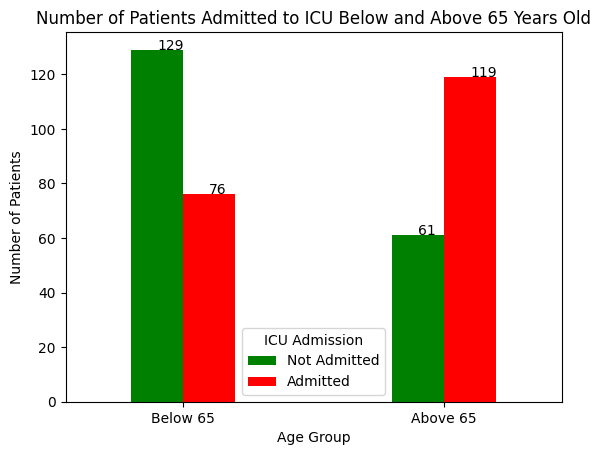

In [ ]:
# Filter for unique patients while keeping the rows where the WINDOW column has a value of ABOVE_12
unique_above_12_patients_data = data[data['WINDOW'] == 'ABOVE_12'].drop_duplicates(subset='PATIENT_VISIT_IDENTIFIER')

# Grouping the unique patient data by AGE_ABOVE65 and ICU, and counting the unique patient IDs
age_icu_groups = unique_above_12_patients_data.groupby(['AGE_ABOVE65', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].nunique().unstack()

# Creating a grouped bar chart with annotations
ax = age_icu_groups.plot(kind='bar', color=['green', 'red'], width=0.4)
plt.title('Number of Patients Admitted to ICU Below and Above 65 Years Old')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Below 65', 'Above 65'], rotation=0)
plt.legend(title='ICU Admission', labels=['Not Admitted', 'Admitted'])

# Adding annotations to the bar chart
for i in ax.patches:
    ax.text(i.get_x() + 0.1, i.get_height() + 0.1, str(int(i.get_height())), color='black')

plt.show()

**Observations from the Distribution of Age (Above 65):** Based on the provided histogram for the AGE_ABOVE65 variable, the following observations can be made:

1.   **Balanced Distribution:** The histogram shows two bars, representing patients aged 65 and below and patients aged above 65. The heights of the bars are relatively similar, indicating a balanced distribution between the two age groups.

2.   **Count of Patients:** The bar for patients aged 65 and below has a slightly higher count, with over 205 patients. The bar for patients aged above 65 has fewer patients: 180. This suggests that there are marginally more younger patients in the dataset, but the difference is not substantial.

3.   **Implications for Analysis:** This balanced age distribution is advantageous for predictive modelling as it ensures that the model can learn from both younger and older patient groups without being biased towards one group. It allows for a comprehensive analysis of how age impacts ICU admissions for COVID-19 patients.

4.  **ICU Admission:** While there are less patients above 65 years old in the dataset, they represent the largest group of patients admitted to the ICU. This confirms our hypothesis that older patients have a higher change of ending up on the ICU. <BR>
Out of the total 385 patients, 195 ended up in the ICU.

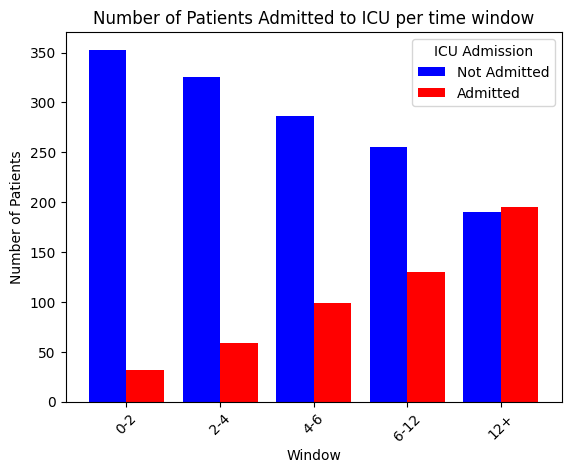

In [ ]:
# Group the data by Window and ICU, and count the unique patient IDs
window_icu_groups = data.groupby(['WINDOW', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].nunique().unstack()

# Create a bar chart with stacked bars
window_icu_groups.plot(kind='bar', stacked=False, color=['blue', 'red'], width=.8)
plt.title('Number of Patients Admitted to ICU per time window')
plt.xticks(range(len(["0-2","2-4","4-6","6-12","12+"])), ["0-2","2-4","4-6","6-12","12+"], rotation=45) #This line is changed
plt.xlabel('Window')
plt.ylabel('Number of Patients')
plt.legend(title='ICU Admission', labels=['Not Admitted', 'Admitted'])
plt.show()


**Observations from the Distribution of Gender:** There is a clear positive correlation between the Window and ICU Admission.  The probability of patients being transferred to the ICU increases with the length of their hospitalization. Consequently, data collected during later windows tend to be more indicative of the need for intensive care.

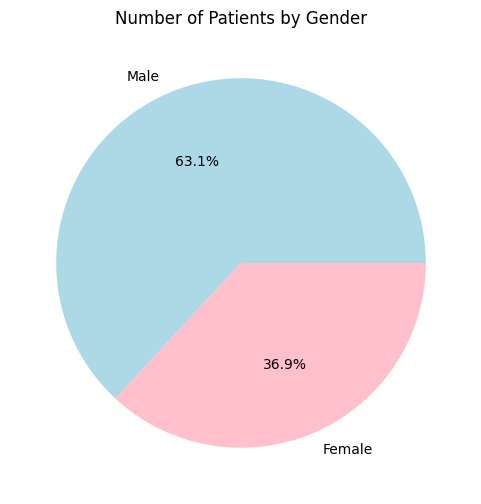

In [ ]:
# Grouping the data by GENDER_LABEL and counting the unique patient IDs
gender_groups = data.groupby('GENDER')['PATIENT_VISIT_IDENTIFIER'].nunique()

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_groups, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Number of Patients by Gender')
plt.show()

**Observations from the Distribution of Gender:** Based on the provided histogram for the GENDER variable, the following observations can be made:

1.   **Gender Distribution:** The dataset contains more male patients than female patients. Specifically, the count of male patients is approximately 243, whereas the count of female patients is around 142.

2.   **Proportional Analysis:** This indicates a gender imbalance in the dataset, with males constituting a larger portion of the patient population. Approximately 63% of the patients are male, while 36% are female.

3.   **Potential Implications:** The gender imbalance should be taken into account when developing predictive models to ensure that the models do not inadvertently favor one gender over the other. It is important to ensure that the predictive performance is equitable across genders.

4.   **Clinical Relevance:** From a clinical perspective, the higher number of male patients may reflect known trends in COVID-19 infection rates and severity, as some studies suggest that males are more likely to experience severe outcomes from COVID-19.

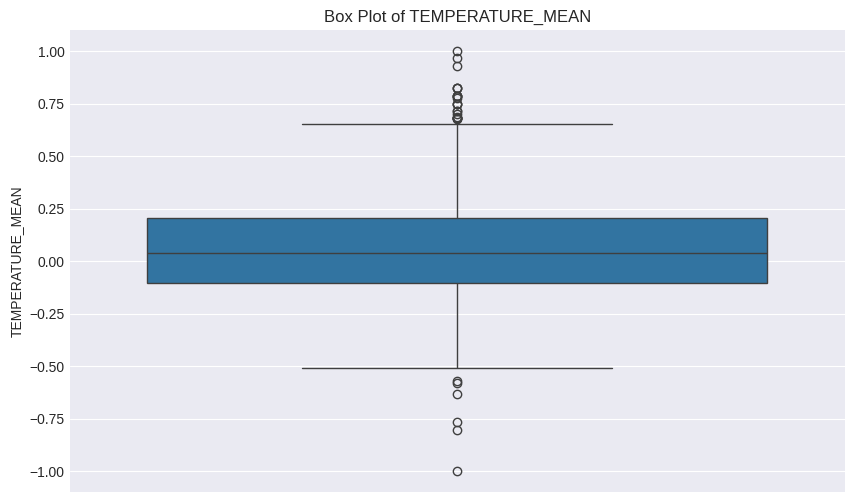

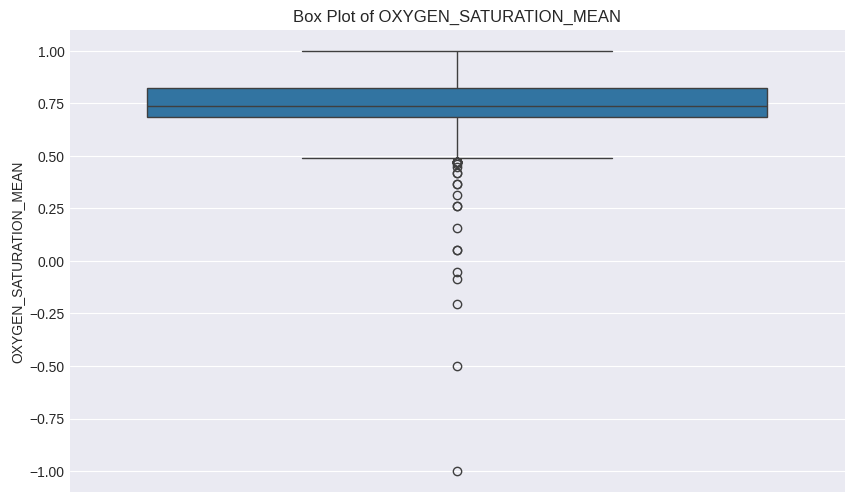

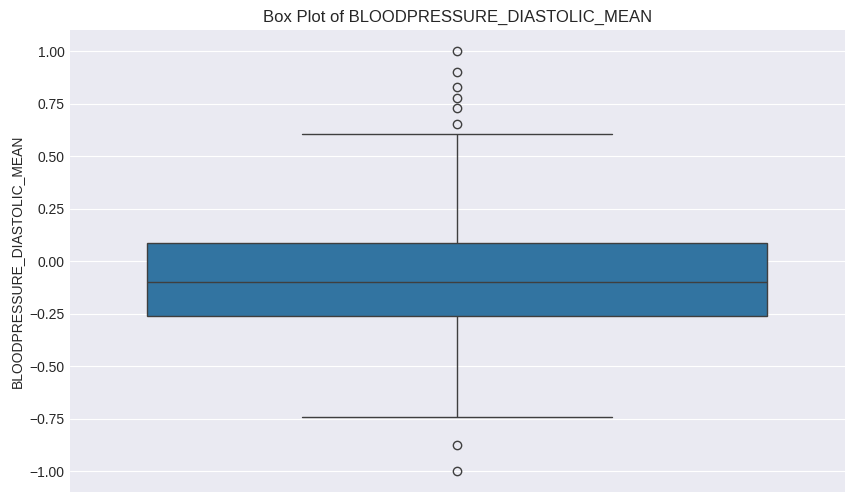

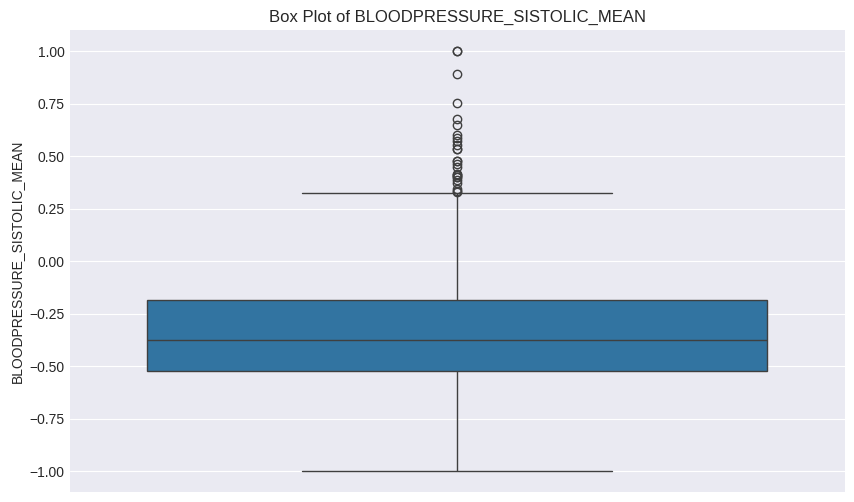

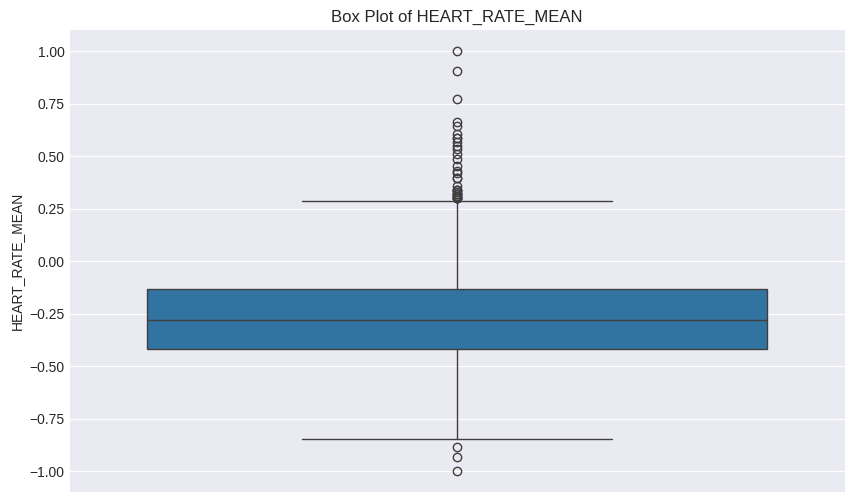

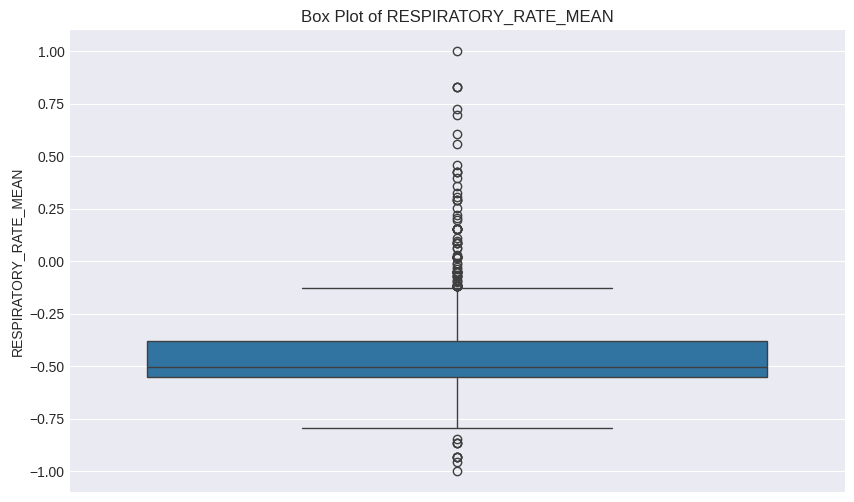

In [33]:
# Update Variable Lists Based on Actual Column Names
continuous_vars = [
    'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
    'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN',
    'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN'
]

# Detect Outliers in Continuous Variables Using Box Plots
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[var].dropna())
    plt.title(f'Box Plot of {var}')
    plt.show()

**Observations from the Box Plots:** Based on the box plots for the continuous variables, the following observations can be made:

1.   **Respiratory Rate (RESPIRATORY_RATE_MEAN):** The box plot shows that the majority of data points fall within a specific range, but there are numerous outliers on both the lower and upper ends. These outliers indicate that some patients have significantly different respiratory rates compared to the majority.

2.   **Heart Rate (HEART_RATE_MEAN):** Similar to respiratory rate, the heart rate data has outliers on both ends. The majority of the data points are clustered within a typical range, but there are significant outliers indicating variability in patient heart rates.

3.   **Systolic Blood Pressure (BLOODPRESSURE_SISTOLIC_MEAN):** The box plot indicates several outliers above the upper whisker. This suggests that while most systolic blood pressure readings are within a normal range, some patients have unusually high systolic blood pressure.

4.   **Diastolic Blood Pressure (BLOODPRESSURE_DIASTOLIC_MEAN):** There are outliers present above the upper whisker, suggesting some patients have higher than average diastolic blood pressure. There are also a few outliers on the lower end.

5.   **Oxygen Saturation (OXYGEN_SATURATION_MEAN):** The majority of data points are within a narrow range, but there are significant outliers below the lower whisker. These outliers represent patients with unusually low oxygen saturation levels.

6.   **Temperature (TEMPERATURE_MEAN):** The temperature data shows outliers both above and below the typical range. This indicates that some patients have temperatures significantly higher or lower than the average.

**Summary**

1.   **Presence of Outliers:** Most of the continuous variables exhibit outliers, indicating variability in patient measurements. These outliers could be due to specific medical conditions, measurement errors, or other factors.

2.   **Typical Range:** Despite the outliers, most variables have a well-defined range where the majority of the data points lie.

3.   **Special Attention:** Variables with significant outliers (e.g., respiratory rate, heart rate, oxygen saturation) may require further investigation to understand the causes of these extreme values.

**Correlation Analysis:** Correlation analysis was conducted to uncover relationships between variables in the dataset. By selecting only numeric columns, a correlation matrix was created, showing the pairwise correlation coefficients between all numeric variables. This correlation matrix was then visualized using a heatmap, where each cell represented the correlation coefficient between two variables. The heatmap allowed for easy identification of strong positive or negative correlations, providing insights into how different variables interact with each other. This step was crucial for identifying potential predictors for ICU admission.

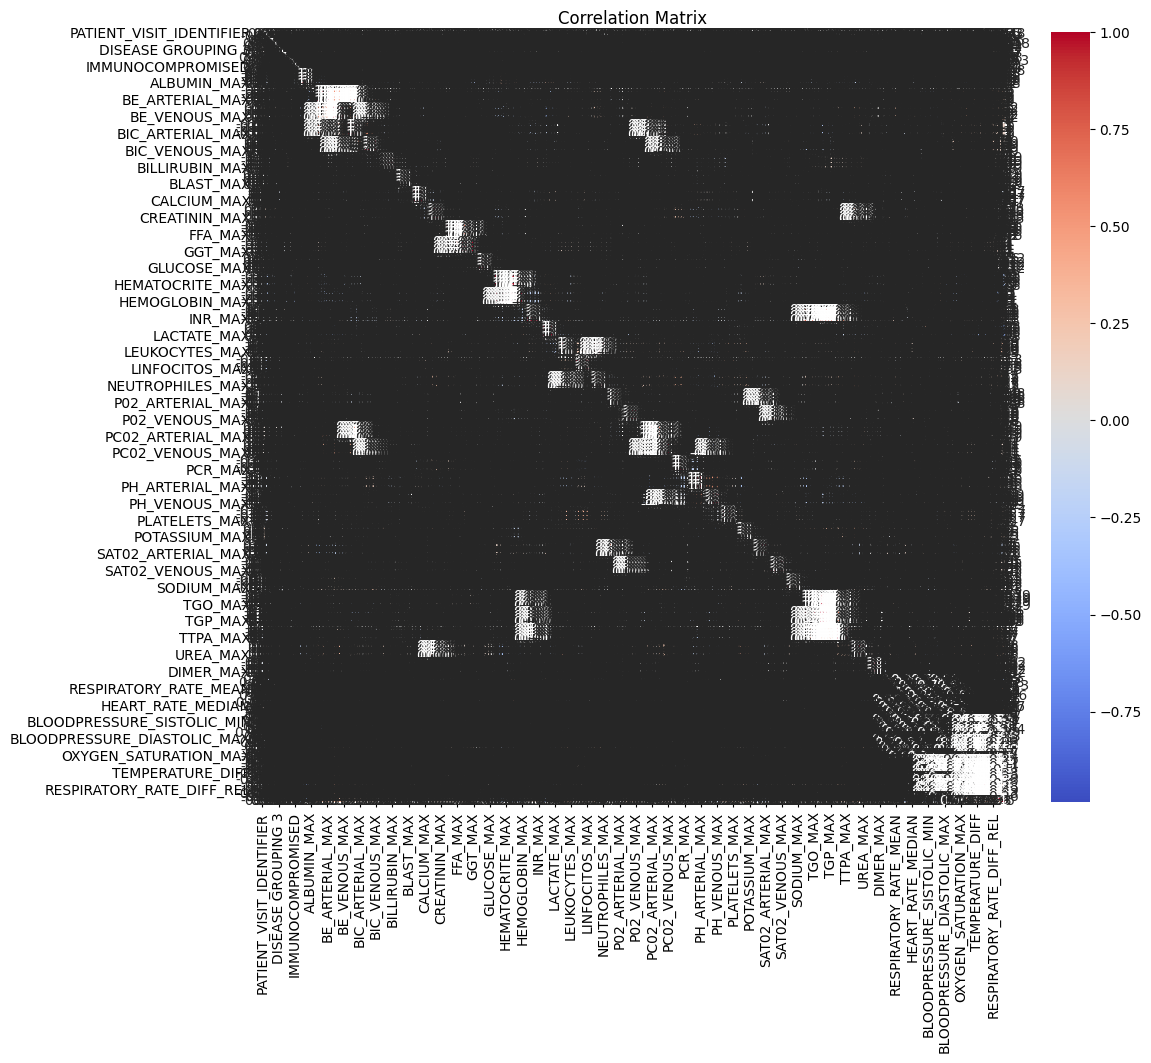

In [ ]:
# Correlation matrix to uncover relationships between variables
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()  # Calculate correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

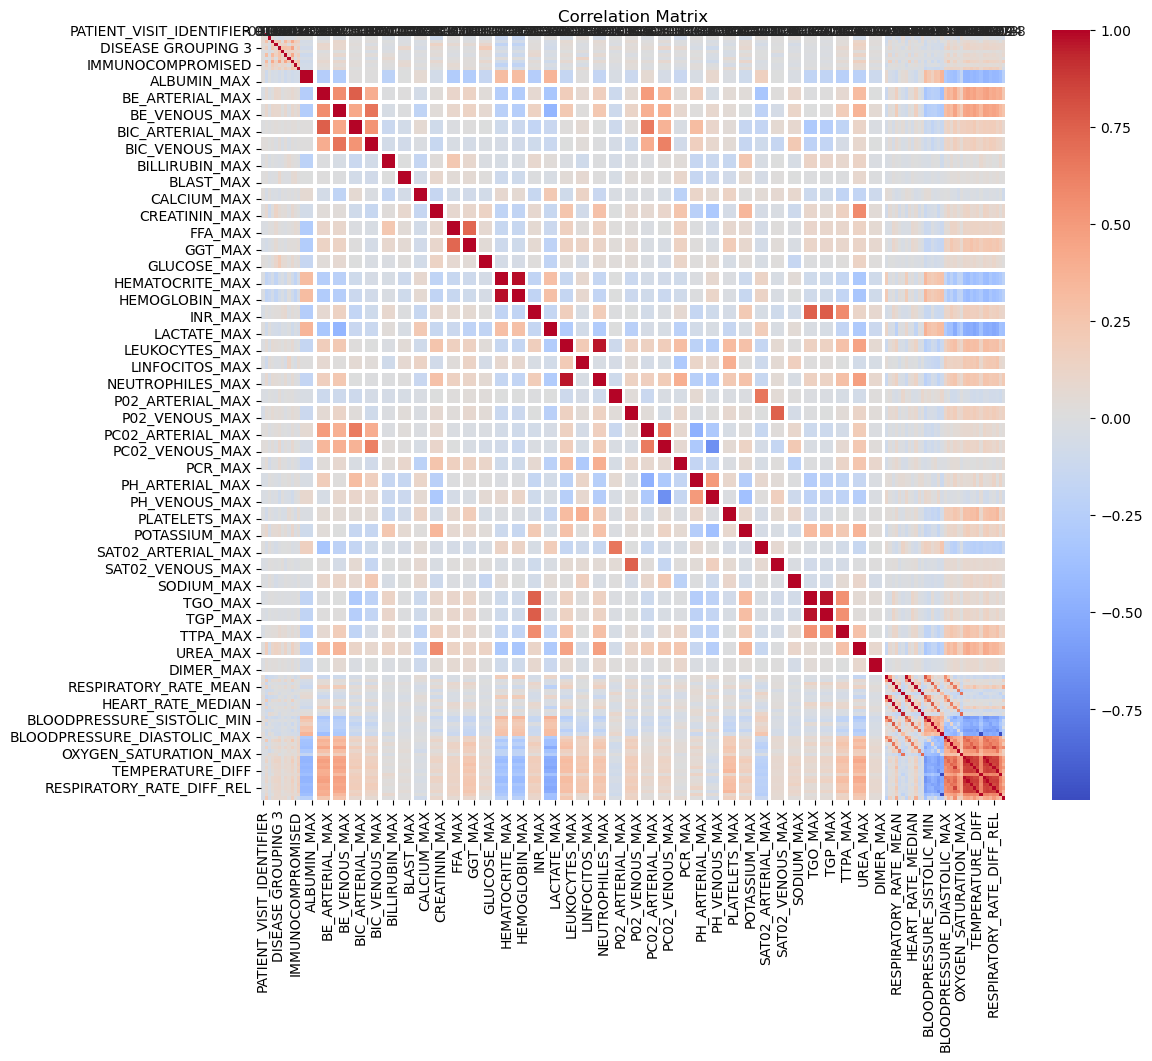

**Observations from the Correlation Matrix.** Based on the correlation matrix, the following observations can be made:

1.   **Strong Correlations:** The bottom right corner of the matrix shows a cluster of strongly correlated variables, particularly among the vital signs and physiological measurements. These variables are highly interrelated, which is expected as they often fluctuate together in response to a patient's health status.

2.   **Negative Correlations:** Some variables exhibit strong negative correlations. For example, RESPIRATORY_RATE_MEAN and OXYGEN_SATURATION_MEAN show a notable negative correlation. This implies that as the respiratory rate increases, oxygen saturation tends to decrease, which is clinically relevant and indicates respiratory distress.

3.   **Low to Moderate Correlations:** Many of the variables in the central portion of the matrix display low to moderate correlations with each other. This suggests a diverse set of measurements that capture different aspects of patient health, with less direct interdependence.

4.   **Clinical Relevance:** The observed correlations align with clinical expectations. For instance, blood pressure measurements are positively correlated with each other, reflecting the interdependence of systolic and diastolic pressures.

**Hypotheses for Predictive Insights:** Based on the provided EDA and visualizations from the dataset, several predictive insights can be formulated as hypotheses:

1.   **Age and ICU Admission:** Older patients, particularly those aged above 65, are likely to have a higher probability of ICU admission. This hypothesis is derived from the observed distribution of age groups and their corresponding ICU admission rates.

2.   **Comorbidities and ICU Admission:** Patients with multiple comorbidities, as indicated by various disease groupings, are expected to have a higher likelihood of ICU admission. The analysis of the disease grouping variables suggests a correlation between the number of comorbidities and the severity of the patient's condition, potentially leading to ICU admission.

3.   **Physiological Measurements and ICU Admission:** Significant deviations in physiological measurements, such as heart rate, systolic blood pressure, and diastolic blood pressure, are anticipated to correlate with higher ICU admission rates. The visualizations of these continuous variables, especially through box plots, reveal that extreme values in these measurements are more prevalent among ICU patients.

4.   **Gender and ICU Admission:** Gender might play a role in the likelihood of ICU admission, with potential differences observed between male and female patients. The distribution of ICU admissions across genders can help in understanding if one gender is more susceptible to severe outcomes requiring intensive care.

5.   **Oxygen Saturation and ICU Admission:** Lower oxygen saturation levels are expected to be associated with a higher probability of ICU admission. This hypothesis is based on the critical role of oxygen saturation in determining the respiratory health of COVID-19 patients.

**Ethical Considerations:** In undertaking the exploration and utilization of patient data to develop predictive models for ICU admissions, it is essential to uphold rigorous ethical standards. This analysis highlights several key ethical considerations that ensure the responsible application of data science and machine learning techniques, thereby enhancing patient outcomes while maintaining respect for patient rights and dignity.

1.   **Data Privacy:** The importance of anonymizing and de-identifying patient data cannot be overstated. By removing or obfuscating personal identifiers, the analysis safeguards against the potential misuse of sensitive information, thereby protecting individual privacy.

2.   **Bias Mitigation:** Identifying and addressing biases within the dataset is critical to preventing unfair or discriminatory outcomes. The analysis examines demographic variables such as age, gender, and race to ensure that the predictive models do not disproportionately impact any specific group, promoting equity in healthcare.

3.   **Transparency:** Transparency in the methods and algorithms used is vital. The analysis ensures that the processes are well-documented and that clear explanations are provided regarding how the models function, the data they utilize, and their inherent limitations. This transparency builds trust and allows for external validation and scrutiny.

4.   **Fairness and Equity:** The predictive models are designed to offer equitable care recommendations across different patient demographics. The analysis includes rigorous testing to confirm that the models perform consistently across all groups, avoiding inadvertent favouritism towards any particular group.

5.   **Informed Consent:** When patient data is used for predictive modelling and research, obtaining informed consent is crucial. Patients are made aware of how their data will be used, the potential benefits, and any associated risks, ensuring that their participation is voluntary and well-informed.

6.   **Beneficence and Non-maleficence:** The principles of beneficence and non-maleficence are central to the ethical use of predictive models. The analysis ensures that the models are used to enhance patient care and outcomes (beneficence) while avoiding harm, such as incorrect predictions leading to inappropriate treatment plans (non-maleficence).

7.   **Accountability:** Clear accountability mechanisms are established for the use of predictive models. This includes regular audits, monitoring model performance, and the ability to address and rectify any issues that arise, ensuring that the models are used responsibly.

8.   **Impact on Healthcare Resources:** Ethical considerations also encompass the impact of predictive models on healthcare resource allocation. The models are designed to optimize the use of limited resources, such as ICU beds and medical personnel, ensuring that these resources are allocated where they are most needed.

# **Data Preparation for ML**

The following steps provide a comprehensive approach to data preparation for machine learning, specifically tailored to the provided dataset. This process ensures that the dataset is clean, standardized, and ready for model training, significantly improving the chances of building a robust and accurate machine learning model. Proper data preparation is fundamental to the success of any machine learning project, as it directly impacts the model's performance and reliability.

**Handle Missing Values:** Handling missing values is crucial as they can lead to inaccuracies and errors in the model. Missing values in numerical columns are handled by filling them with their median values. This approach prevents skewing the data and ensures that missing values do not lead to inaccuracies in the model. It is noted that categorical columns did not contain any missing values in this dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

# Numerical columns are filled with their median values to avoid skewing the data
numerical_columns = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Confirm that categorical columns do not contain any missing values
categorical_columns_missing = data[categorical_columns].isnull().sum()
print("Missing values in categorical columns:\n", categorical_columns_missing)

Missing values in categorical columns:
 AGE_PERCENTIL    0
WINDOW           0
dtype: int64


**Observations from Handle Missing Values:** The categorical columns identified in the dataset are AGE_PERCENTIL and WINDOW. There were no missing values in these columns, ensuring that the categorical data is complete and reliable for analysis. This completeness is crucial for accurate machine learning models, as missing values in categorical data can introduce bias and reduce model performance.

**Feature selection:** In the dataset, some test results are recorded only once within each time frame, leading to identical minimum and maximum values for these measurements. As a result, the difference between these values is consistently zero. This redundancy allows us to eliminate these columns, thereby simplifying the dataset by reducing the number of features.

In [27]:
# Remove columns with low variance (same values)
low_variance_cols = [col for col in data.columns if data[col].nunique() == 1]
data = data.drop(columns=low_variance_cols)

# Find and remove columns with duplicate values
duplicate_cols = []
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        if data.iloc[:, i].equals(data.iloc[:, j]):
            duplicate_cols.append(data.columns[j])

# Remove the duplicate columns
filtered_data = data.drop(columns=duplicate_cols)

# Print the number of original and remaining columns
print(f'Number of original columns: {len(data.columns)}')
print(f'Number of remaining columns: {len(filtered_data.columns)}')

Number of original columns: 195
Number of remaining columns: 87


**Observation from Feature Selection:**

1.   **Significant Reduction in Columns:** The original dataset had 195 columns, and after removing low variance and duplicate columns, only 87 columns remain. This is a substantial reduction, indicating that many columns in the original dataset either had the same value for all entries or were duplicates of other columns.

2.   **Low Variance Columns:** Columns with low variance (same values across all rows) do not contribute any useful information for predictive modeling or data analysis, as they cannot differentiate between different data points.

3.   **Duplicate Columns:** Duplicate columns do not add any new information and can lead to redundancy. Their removal simplifies the dataset and can improve the performance of machine learning models by reducing multicollinearity and the complexity of the model.

**Handling Outliers:** Outliers are handled using the Z-score method from the scipy.stats library. Z-scores are calculated for numerical columns, and any rows with Z-scores greater than the threshold of 3 are considered outliers and removed. The dataset without outliers, named data_no_outliers, is then summarized to display its statistical properties after outlier removal. This step ensures that extreme values that could skew the analysis are excluded from the dataset.

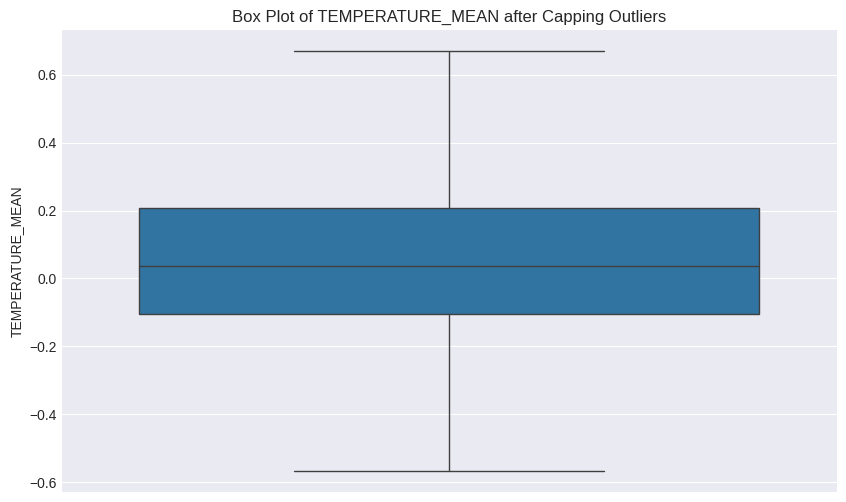

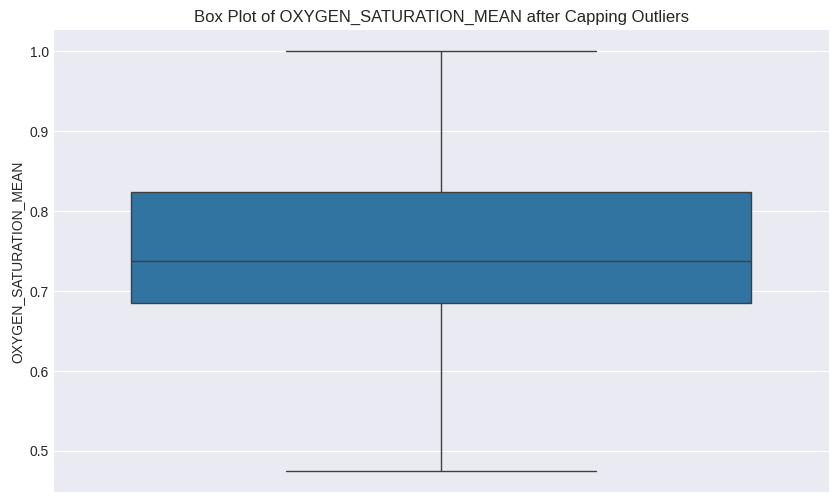

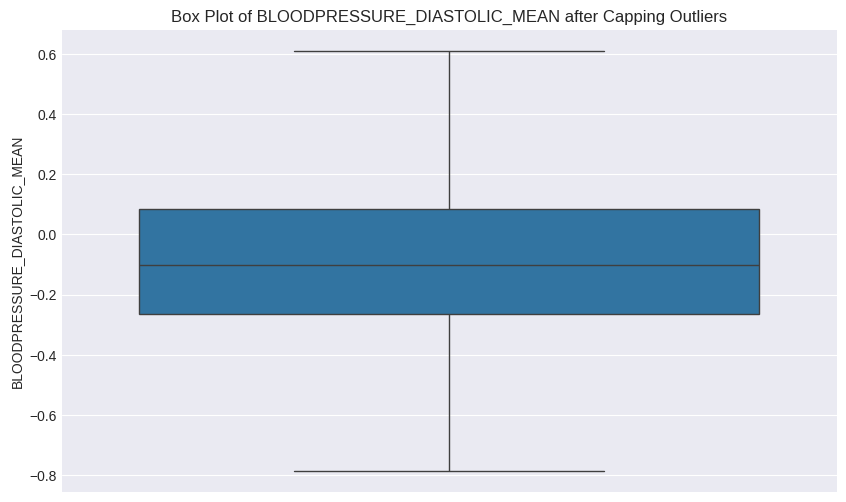

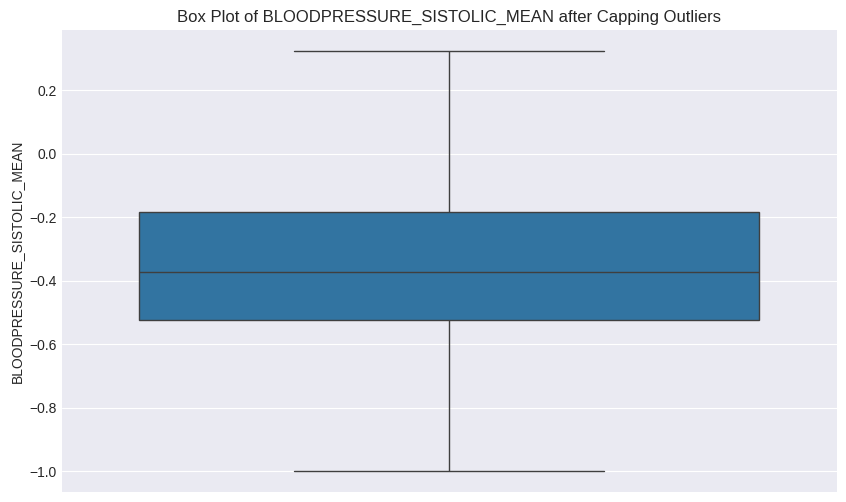

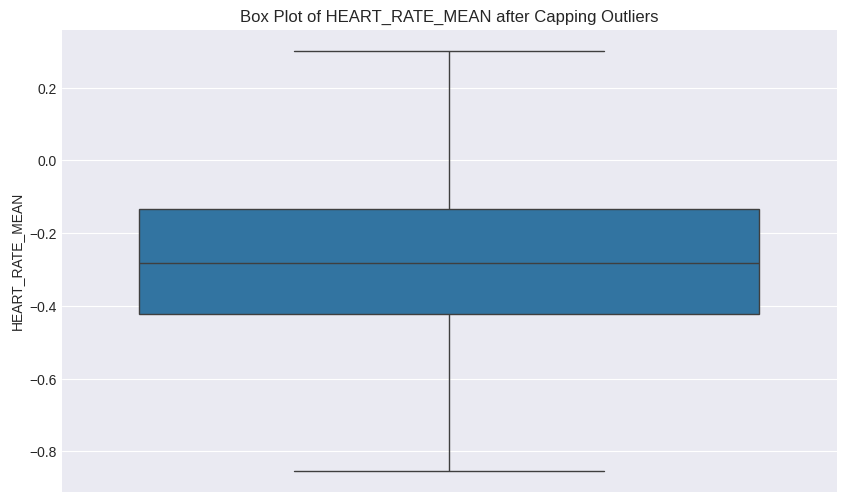

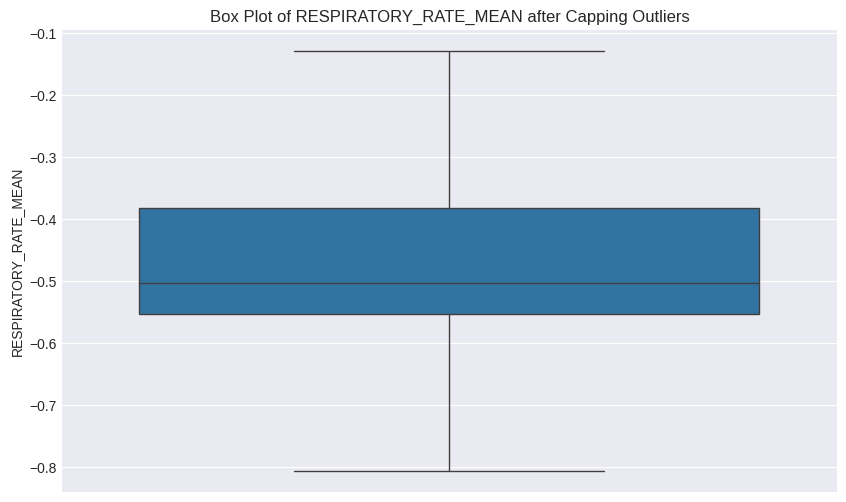

In [34]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply the function to the dataset
capped_data = cap_outliers(data.copy(), continuous_vars)

# Verify by plotting the box plots again
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(capped_data[var].dropna())
    plt.title(f'Box Plot of {var} after Capping Outliers')
    plt.show()

**Observations from Handling Outliers:** Based on the results of the box plots after handling outliers using the capping method:

1.   **Temperature (TEMPERATURE_MEAN):** The box plot now shows a more compact distribution with no extreme values. The interquartile range (IQR) is well-defined, and the whiskers extend to the capped outlier boundaries.

2.   **Oxygen Saturation (OXYGEN_SATURATION_MEAN):** The distribution is now more uniform, with outliers capped. The majority of the data points lie within the interquartile range, and the whiskers represent the new boundaries.

3.   **Diastolic Blood Pressure (BLOODPRESSURE_DIASTOLIC_MEAN):** The box plot shows a more controlled range of values, with no extreme outliers. The whiskers indicate the new minimum and maximum values after capping.

4.   **Systolic Blood Pressure (BLOODPRESSURE_SISTOLIC_MEAN):** Similar to diastolic blood pressure, the systolic blood pressure values are now within a controlled range. The outliers have been capped, leading to a more uniform distribution.

5.   **Heart Rate (HEART_RATE_MEAN):** The distribution of heart rate values is more compact, with the outliers capped. The whiskers now represent the new boundaries of the data.

6.   **Respiratory Rate (RESPIRATORY_RATE_MEAN):** The respiratory rate values show a more uniform distribution with outliers capped. The interquartile range is well-defined, and the whiskers indicate the new limits.

**Summary**

1.   **Improved Data Quality:** By capping the outliers, the data quality is improved, leading to more reliable and robust statistical analysis and modeling.

2.   **Reduced Impact of Outliers:** The extreme values that could potentially skew the results or affect the performance of machine learning models are now managed, reducing their impact on the analysis.

3.   **Uniform Distributions:** The distributions of the continuous variables are now more uniform, which can help in achieving better model performance and interpretability.

**Encoding Categorical Variables:** Categorical variables are encoded using pandas.get_dummies, converting them into dummy variables while dropping the first category to avoid multicollinearity.

In [ ]:
categorical_cols = data_no_outliers.select_dtypes(include=[object]).columns
data_no_outliers = pd.get_dummies(data_no_outliers, columns=categorical_cols, drop_first=True)

**Normalizing Numerical Features:** Numerical features are normalized using StandardScaler to have zero mean and unit variance, which is important for ensuring that all features contribute equally to the model.

In [ ]:
num_cols = data_no_outliers.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data_no_outliers[num_cols] = scaler.fit_transform(data_no_outliers[num_cols])

**Splitting the Dataset:** The dataset is split into training and testing sets using train_test_split, with 80% of the data allocated for training and 20% for testing.

In [ ]:
X = data_no_outliers.drop('ICU', axis=1)
y = data_no_outliers['ICU']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Balancing the Dataset with SMOTE:** To address class imbalance, SMOTE is applied to the training set to oversample the minority class, ensuring that the model does not become biased towards the majority class.

In [ ]:
# Ensure target variable is integer
y_train = y_train.astype(int)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Balanced X_train shape:", X_train_balanced.shape)
print("Balanced y_train shape:", y_train_balanced.shape)

Balanced X_train shape: (1600, 241)
Balanced y_train shape: (1600,)


**Observations from Balancing the Dataset with SMOTE:** After applying SMOTE to balance the training set, the shapes of X_train and y_train are both (1600, 241) and (1600,), respectively. This indicates that the training dataset now has 1600 samples, each with 241 features, and the class distribution is balanced. SMOTE generated synthetic samples for the minority class, addressing the class imbalance and improving the model's ability to accurately predict ICU admissions for COVID-19 patients. This balancing helps the model learn more effectively from both classes, enhancing its performance and generalization.

**Saving the Processed Data:** The processed training and testing sets, along with their corresponding target variables, are saved as CSV files using to_csv. This step ensures that the prepared data is stored for future use.

In [ ]:
X_train_balanced.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train_balanced.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

**Displaying the Processed Data:** The first few rows of the processed training set are displayed to verify the preprocessing steps.

In [ ]:
print("First few rows of the processed training set:")
print(X_train_balanced.head())

First few rows of the processed training set:
   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65    GENDER  DISEASE GROUPING 1  \
0                 -0.100707    -0.806012  1.253811           -0.247436   
1                 -1.519595     1.240676 -0.797568           -0.247436   
2                  1.264972     1.240676  1.253811            4.041452   
3                 -1.351102    -0.806012 -0.797568           -0.247436   
4                  0.635341     1.240676  1.253811           -0.247436   

   DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 5  DISEASE GROUPING 6       HTN  ...  AGE_PERCENTIL_50th  \
0           -0.280088                 

**Observations from Displaying the Processed Data:** From the first few rows of the processed training set, several observations can be made.

1.   **Standardization/Normalization:** The numerical features, such as PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, GENDER, and DISEASE GROUPING 1, have been standardized or normalized. This is evident from the transformed values, which are centered around 0 with varying scales.

2.   **Disease Grouping:** Columns related to disease groupings (e.g., DISEASE GROUPING 1 to DISEASE GROUPING 6) show mostly zero values, indicating that these conditions are not present in most of the samples.

3.   **Binary Indicators:** The binary columns for age percentiles (e.g., AGE_PERCENTIL_50th, AGE_PERCENTIL_60th) and time windows (e.g., WINDOW_2-4, WINDOW_4-6) indicate the presence (True) or absence (False) of these categories for each patient. This one-hot encoding is used to represent categorical variables numerically.

4.   **Hypertension (HTN):** The HTN column has been standardized, similar to other numerical features, and shows a mix of positive and negative values.

5.   **Presence of Categorical and Numerical Data:** The dataset contains both numerical features (standardized) and categorical features (one-hot encoded), indicating a mix of data types suitable for machine learning models.

**Checking for Missing Values:** The code checks for missing values in the processed training set using X_train_balanced.isnull().sum().

In [ ]:
print("\nMissing values in the processed training set:")
print(X_train_balanced.isnull().sum())


Missing values in the processed training set:
PATIENT_VISIT_IDENTIFIER    0
AGE_ABOVE65                 0
GENDER                      0
DISEASE GROUPING 1          0
DISEASE GROUPING 2          0
                           ..
AGE_PERCENTIL_Above 90th    0
WINDOW_2-4                  0
WINDOW_4-6                  0
WINDOW_6-12                 0
WINDOW_ABOVE_12             0
Length: 241, dtype: int64


**Checking Data Types:** The data types of the processed training set columns are displayed using X_train_balanced.dtypes.

In [ ]:
print("\nData types of the processed training set columns:")
print(X_train_balanced.dtypes)


Data types of the processed training set columns:
PATIENT_VISIT_IDENTIFIER    float64
AGE_ABOVE65                 float64
GENDER                      float64
DISEASE GROUPING 1          float64
DISEASE GROUPING 2          float64
                             ...   
AGE_PERCENTIL_Above 90th       bool
WINDOW_2-4                     bool
WINDOW_4-6                     bool
WINDOW_6-12                    bool
WINDOW_ABOVE_12                bool
Length: 241, dtype: object


**Statistical Summary of Processed Training Set:** A statistical summary of the processed training set is displayed using X_train_balanced.describe(), providing insights into the distribution and central tendency of the scaled and balanced data.

In [ ]:
print("\nStatistical summary of the processed training set:")
print(X_train_balanced.describe())


Statistical summary of the processed training set:
       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1600.000000  1600.000000  1600.000000         1600.000000   
mean                  -0.019299     0.179148    -0.021167           -0.010752   
std                    0.923820     0.975285     0.942875            0.940540   
min                   -1.688088    -0.806012    -0.797568           -0.247436   
25%                   -0.795563    -0.806012    -0.797568           -0.247436   
50%                    0.005709    -0.025470    -0.797568           -0.247436   
75%                    0.760277     1.240676     1.253811           -0.247436   
max                    1.699506     1.240676     1.253811            4.041452   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count              1600.0              1600.0              1600.0   
mean                  0.0                 0.0                 0.0   
std        

**Visualizing Feature Distributions:** Histograms with kernel density estimates (KDE) are plotted for the first five numerical columns to visualize their distributions. This helps in understanding the distribution of the features after preprocessing.

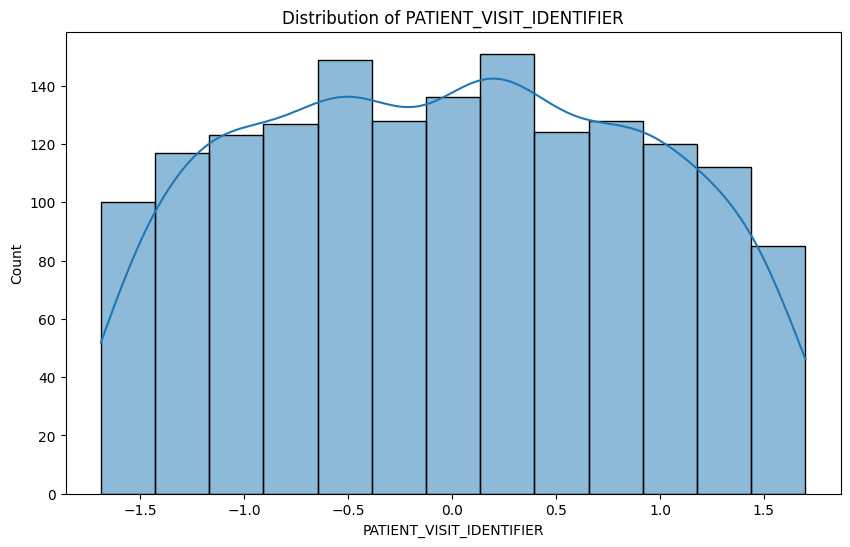

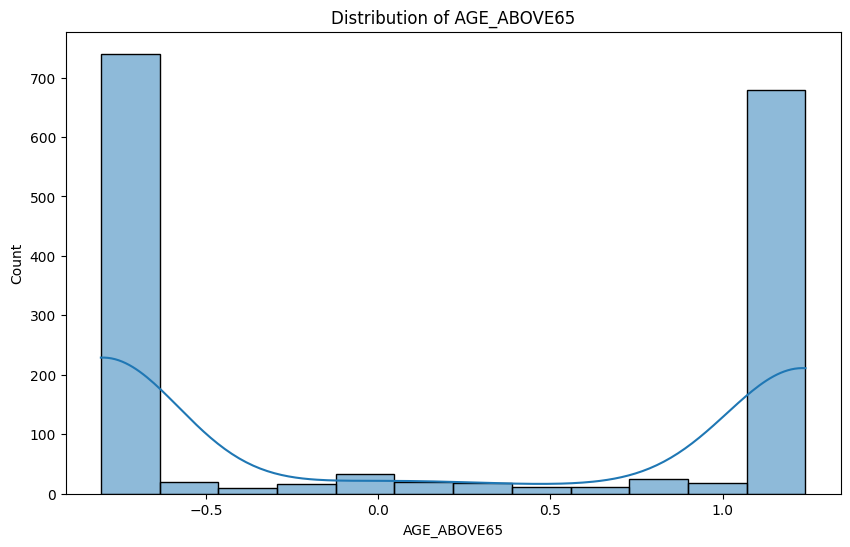

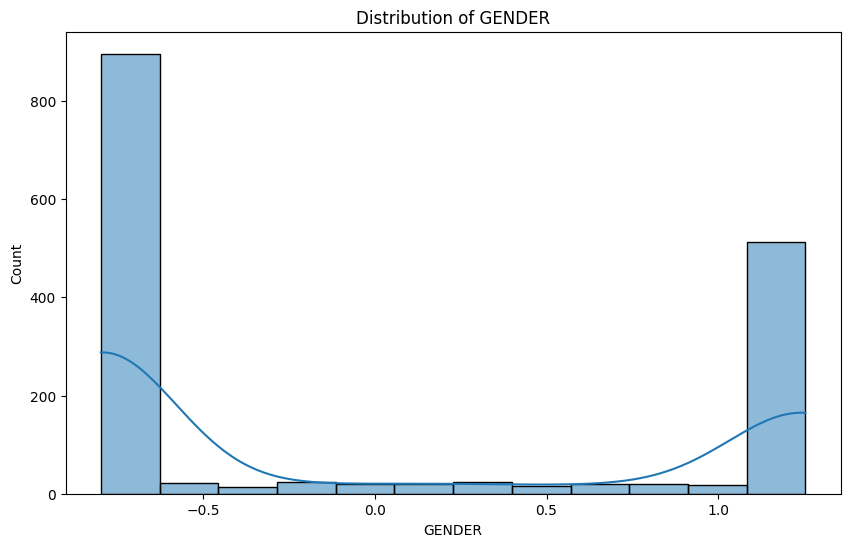

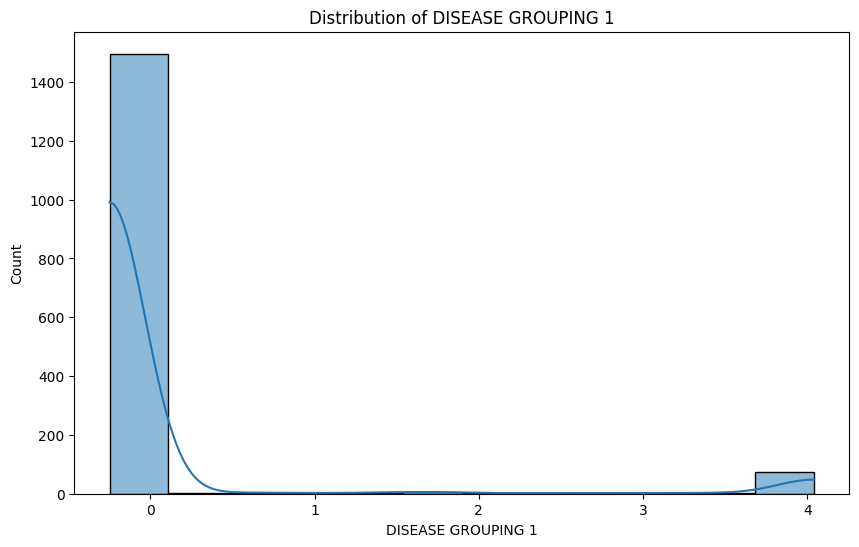

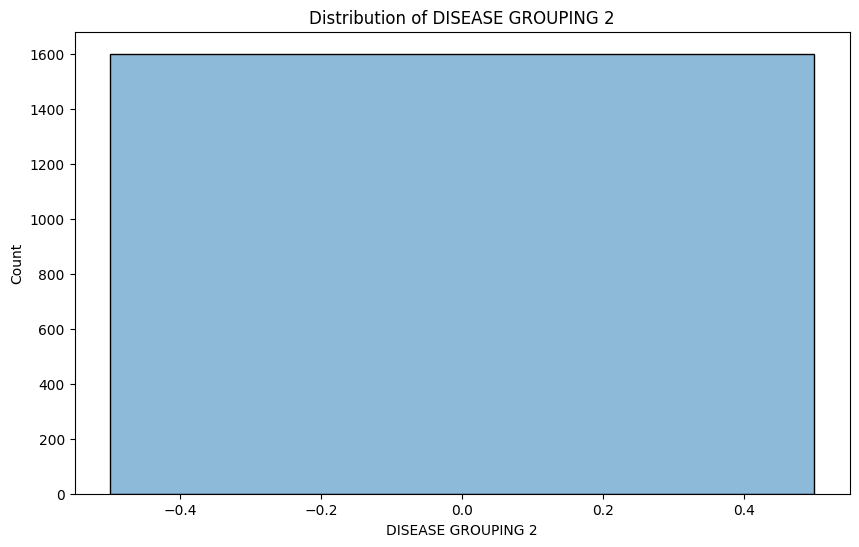

In [ ]:
for col in num_cols[:5]:  # Visualize first 5 numerical columns
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train_balanced[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Distribution of Target Variable:** A count plot is generated to show the distribution of the target variable (ICU), confirming the effectiveness of the balancing step.

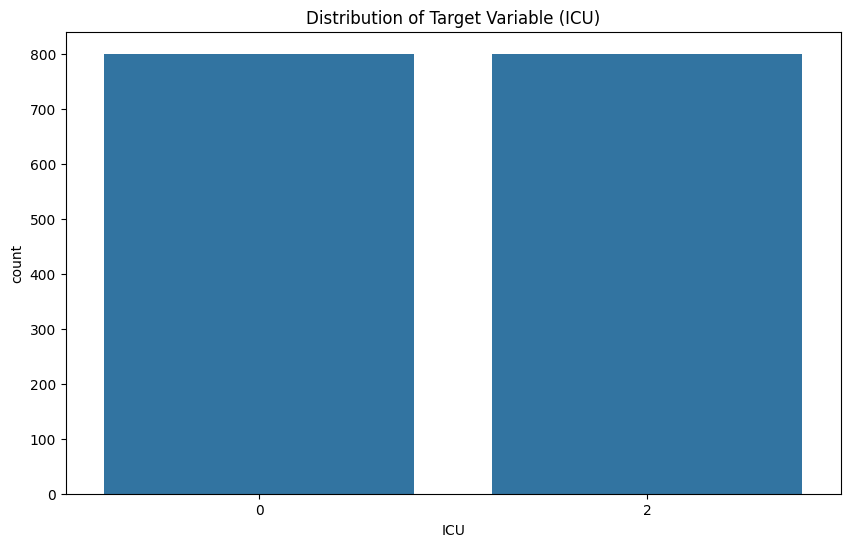

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_balanced)
plt.title('Distribution of Target Variable (ICU)')
plt.show()

**Observations from Distribution of Target Variable (ICU):**

1.   **Balanced Classes:** The chart shows that there are equal numbers of instances for each class in the target variable (ICU). Both classes, 0 and 1, have approximately 800 instances each, indicating a perfectly balanced dataset. This balance was likely achieved through the application of SMOTE (Synthetic Minority Over-sampling Technique) as previously mentioned.

2.   **Model Training Benefit:** A balanced target variable ensures that the machine learning model will not be biased towards one class over the other. This balance helps the model learn equally from both classes, improving its ability to correctly predict ICU admissions and non-ICU cases.

3.   **Improved Evaluation Metrics:** With balanced classes, evaluation metrics such as accuracy, precision, recall, and F1-score will be more reliable and reflective of the model's true performance across both classes.

This comprehensive approach ensures that the dataset is thoroughly prepared for machine learning tasks, including handling outliers, encoding categorical variables, normalizing numerical features, balancing the dataset, and verifying the integrity of the processed data.

# **References**

Johns Hopkins University (2021) *COVID-19 Dashboard by the Centre for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)', Johns Hopkins Coronavirus Resource Centre.* Available at: https://coronavirus.jhu.edu/map.html (Accessed 22 June 2021).

Hospital Sírio-Libanês (2020) *COVID-19 Dataset from Sírio Libanês', Kaggle.* Available at: https://www.kaggle.com/datasets/Sírio-Libanes/covid19 (Accessed 22 June 2021).